# ** Pytorch Practice**

In [1]:
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-sdjq6k5b
  Running command git clone -q https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-sdjq6k5b
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4990 sha256=92721fc7a7d9922ed4f7ddd2d17539f41cc0a0d74258fd6eaa1294f9d50fd6f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-b18p34lo/wheels/69/06/fd/652908d49c931cdcca96be3c727fb11ed777a3a62402210396
Successfully built torchviz


In [2]:
import torch.nn as nn

Pytorch latest version

In [4]:
import torch
torch.__version__

'1.12.1+cu113'

create a simple model

In [5]:
input_node = 2
output_node = 2
model = nn.Linear(input_node, output_node, bias = True)
input = torch.tensor([1.,2.])
output = model(input)
print(output.size())

torch.Size([2])


visualize the model

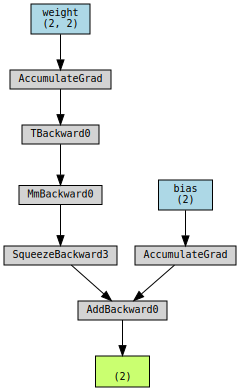

In [6]:
from torchviz import make_dot
make_dot(model(input), params= dict(model.named_parameters()))

**Convolutional Neural Network**

create image

In [47]:
image = torch.rand(3,9,9) #  (channel, height, weight)
print(image.shape)

torch.Size([3, 9, 9])


create model of convolutional Neural Network

In [48]:
in_channels = 3
out_channels = 5
kernel_size = 3
model = torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
output = model(image)
print(output.size())

torch.Size([5, 7, 7])


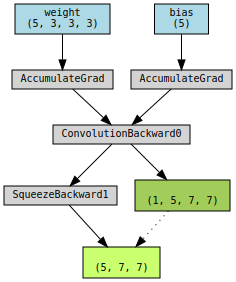

In [49]:
make_dot(model(image), params= dict(model.named_parameters()))

**pooling layer**

In [55]:
kernel_size = 2
pool_layer = nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
output = pool_layer(image)
print(output.shape)

torch.Size([3, 4, 4])


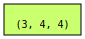

In [56]:
make_dot(pool_layer(image), params= dict(model.named_parameters()))

***create a complete model containing convolutional layers***

In [59]:
model = nn.Sequential(
    nn.Conv2d(3,5,3,2,1), # (input channel, output channel, kernel size, stride , padding)
    nn.ReLU(),
    nn.Conv2d(5,5,1,1,0)
)
input = torch.randn(3,32,32)
print(model(input).size())
print(model)

torch.Size([5, 16, 16])
Sequential(
  (0): Conv2d(3, 5, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(5, 5, kernel_size=(1, 1), stride=(1, 1))
)


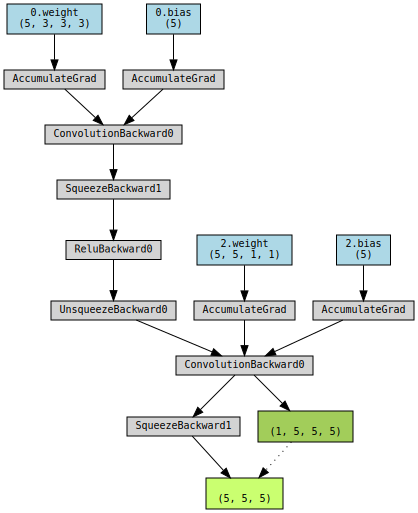

In [60]:
make_dot(model(image), params= dict(model.named_parameters()))